/Users/chenyk/aaspip.pyseistr/pyseistr/plot.py:125: UserWarning: The following kwargs were not used by contour: 'barlabel'
  _ = ax.contourf(
/Users/chenyk/aaspip.pyseistr/pyseistr/plot.py:130: UserWarning: The following kwargs were not used by contour: 'barlabel'
  _ = ax.contourf(
/Users/chenyk/aaspip.pyseistr/pyseistr/plot.py:135: UserWarning: The following kwargs were not used by contour: 'barlabel'
  C = ax.contourf(


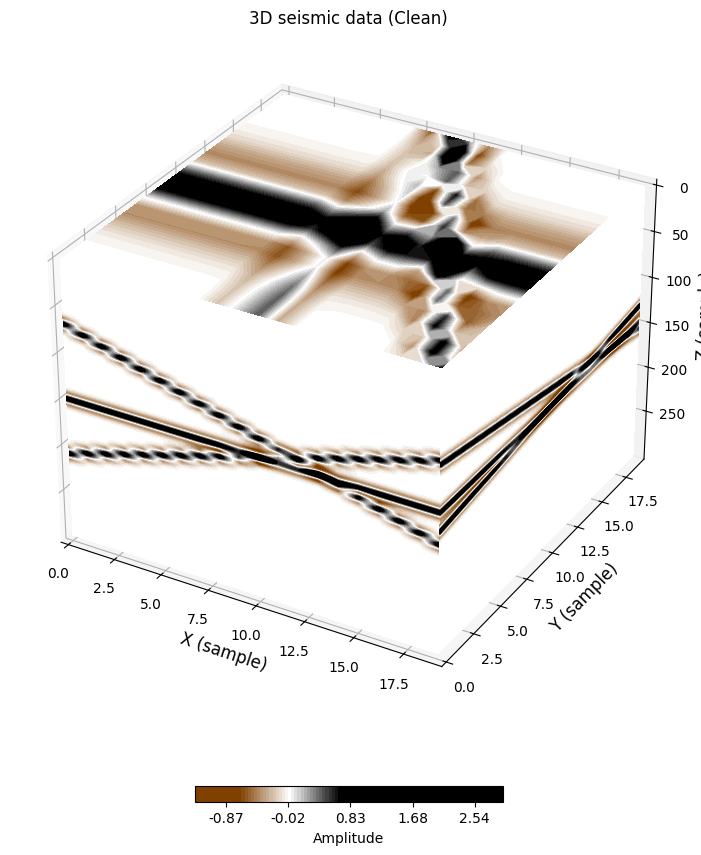

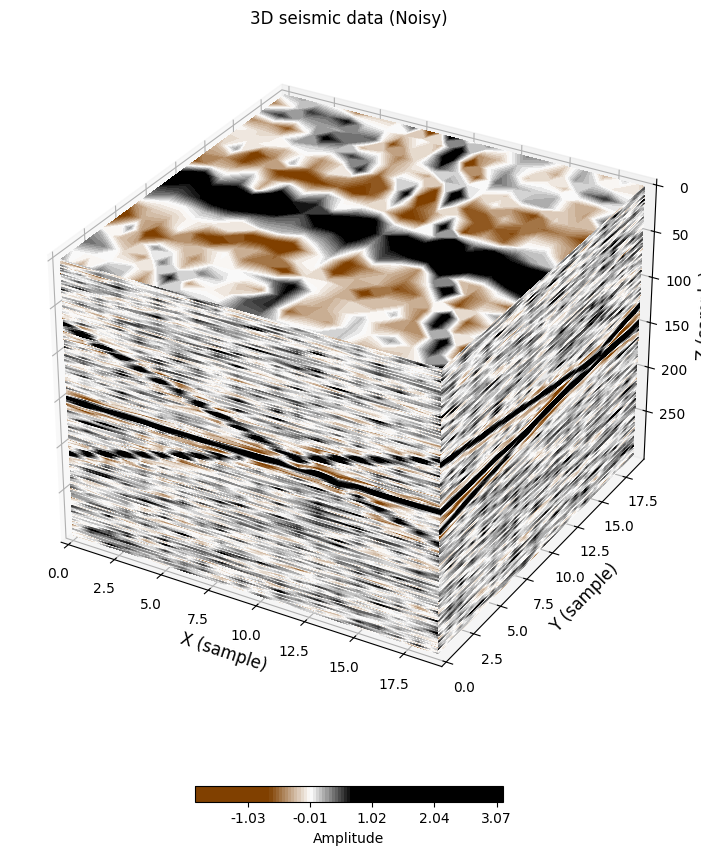

In [1]:
# Prepared On Jan 1, 2025 by Yangkang Chen, UT-Austin
#
# As a reproduced example for four papers
# [0] Saad, O.M., Fomel, S., Abma, R. and Chen, Y., 2023. Unsupervised deep learning for 3D interpolation of highly incomplete data. Geophysics, 88(1), pp.WA189-WA200.
# [1] Chen, Y., Zhang, M., Bai, M., & Chen, W. (2019). Improving the signal‐to‐noise ratio of seismological datasets by unsupervised machine learning. Seismological Research Letters, 90(4), 1552-1564.
# [2] Saad, O. M., & Chen, Y. (2021). A fully unsupervised and highly generalized deep learning approach for random noise suppression. Geophysical Prospecting, 69(4), 709-726.
# [3] Yang, L., Wang, S., Chen, X., Saad, O.M., Chen, W., Oboue, Y.A.S.I. and Chen, Y., 2021. Unsupervised 3-D random noise attenuation using deep skip autoencoder. IEEE Transactions on Geoscience and Remote Sensing, 60, pp.1-16.
#
# NOTE: both examples are unsupervised learning approaches. 
# Please use the latest pyseistr package:
# https://github.com/aaspip/pyseistr
#
# Environment: 
# CPU machine
# conda create -n uml python=3.11.7
# conda activate uml
# conda install ipython notebook
# pip install matplotlib==3.8.0 tensorflow==2.14.0 scikit-learn==1.2.2 seaborn==0.13.2 
# 
# GPU machine
# conda create -n uml python=3.10.14
# conda activate uml
# conda install ipython notebook
# pip install matplotlib==3.8.0 tensorflow==2.11.0 scikit-learn==1.2.2 seaborn==0.13.2 
# conda install -c anaconda cudnn==8.2.1
#
#
#generate data
import numpy as np
from pyseistr import genplane3d,plot3d
import matplotlib.pyplot as plt
data,noisy=genplane3d(noise=True,seed=202425,var=0.1);

dz=1;dx=1;dy=1;
[nz,nx,ny]=data.shape;
plot3d(data,vmin=-1,vmax=1,figsize=(14,10),z=np.arange(nz)*dz,x=np.arange(nx)*dx,y=np.arange(ny)*dy,barlabel='Amplitude',showf=False,close=False)
plt.gca().set_xlabel("X (sample)",fontsize='large', fontweight='normal')
plt.gca().set_ylabel("Y (sample)",fontsize='large', fontweight='normal')
plt.gca().set_zlabel("Z (sample)",fontsize='large', fontweight='normal')
plt.title('3D seismic data (Clean)')
plt.savefig(fname='data3d-clean.png',format='png',dpi=300)
plt.show()

plot3d(noisy,vmin=-1,vmax=1,figsize=(14,10),z=np.arange(nz)*dz,x=np.arange(nx)*dx,y=np.arange(ny)*dy,barlabel='Amplitude',showf=False,close=False)
plt.gca().set_xlabel("X (sample)",fontsize='large', fontweight='normal')
plt.gca().set_ylabel("Y (sample)",fontsize='large', fontweight='normal')
plt.gca().set_zlabel("Z (sample)",fontsize='large', fontweight='normal')
plt.title('3D seismic data (Noisy)')
plt.savefig(fname='data3d-noisy.png',format='png',dpi=300)
plt.show()




/Users/chenyk/aaspip.pyseistr/pyseistr/plot.py:125: UserWarning: The following kwargs were not used by contour: 'barlabel'
  _ = ax.contourf(
/Users/chenyk/aaspip.pyseistr/pyseistr/plot.py:130: UserWarning: The following kwargs were not used by contour: 'barlabel'
  _ = ax.contourf(
/Users/chenyk/aaspip.pyseistr/pyseistr/plot.py:135: UserWarning: The following kwargs were not used by contour: 'barlabel'
  C = ax.contourf(


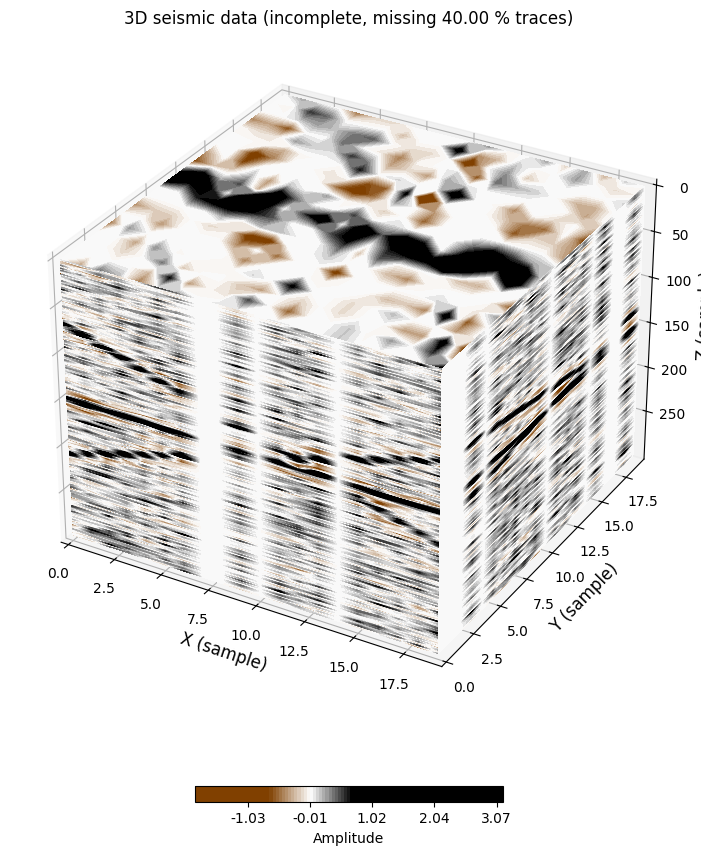

In [2]:
from pydrr import genmask
ratio=0.6;
mask=genmask(data.reshape(nz,nx*ny,order='F'),ratio,'c',201415);
mask=mask.reshape(nz,nx,ny,order='F');
dobs=noisy*mask;

plot3d(dobs,vmin=-1,vmax=1,figsize=(14,10),z=np.arange(nz)*dz,x=np.arange(nx)*dx,y=np.arange(ny)*dy,barlabel='Amplitude',showf=False,close=False)
plt.gca().set_xlabel("X (sample)",fontsize='large', fontweight='normal')
plt.gca().set_ylabel("Y (sample)",fontsize='large', fontweight='normal')
plt.gca().set_zlabel("Z (sample)",fontsize='large', fontweight='normal')
plt.title('3D seismic data (incomplete, missing {:.2f} % traces)'.format(100-ratio*100))
plt.savefig(fname='data3d-obs.png',format='png',dpi=300)
plt.show()


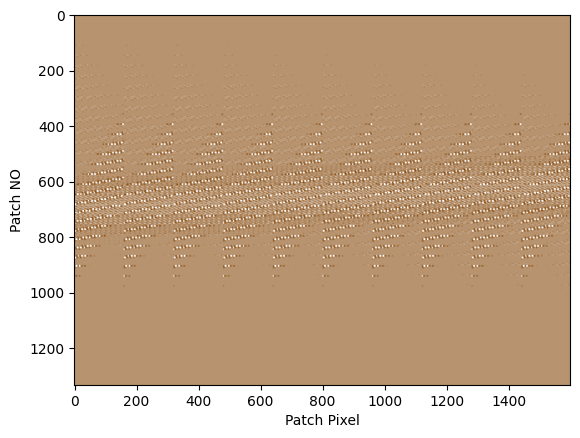

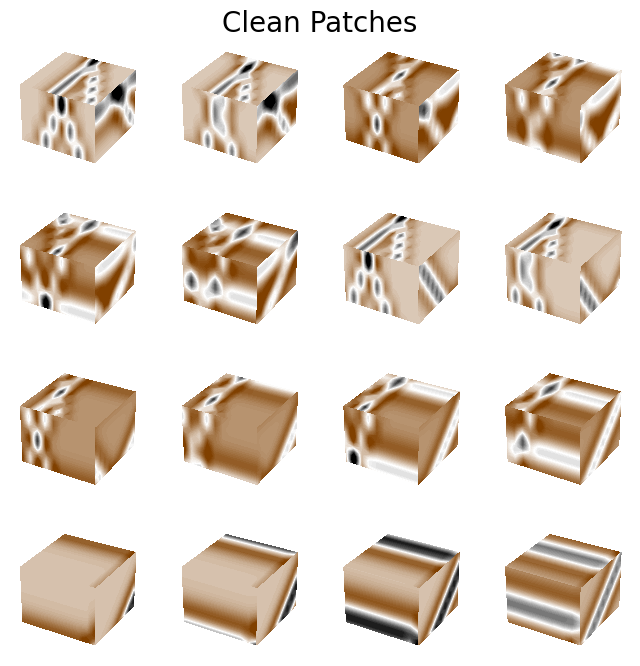

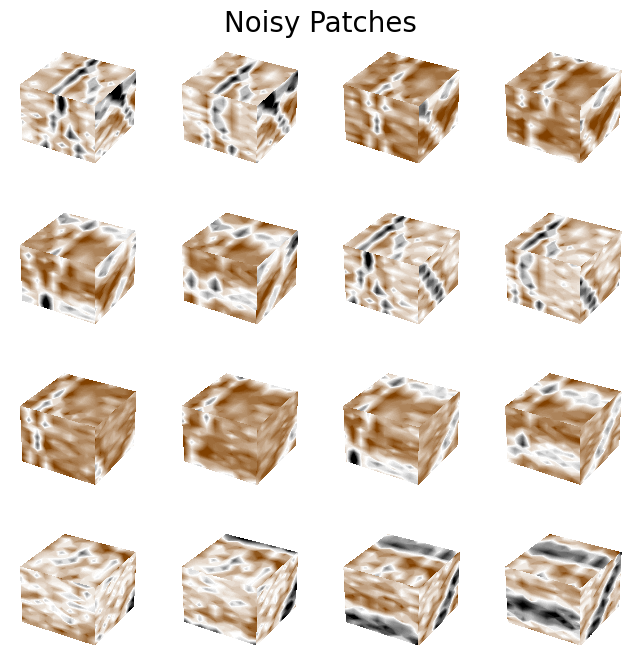

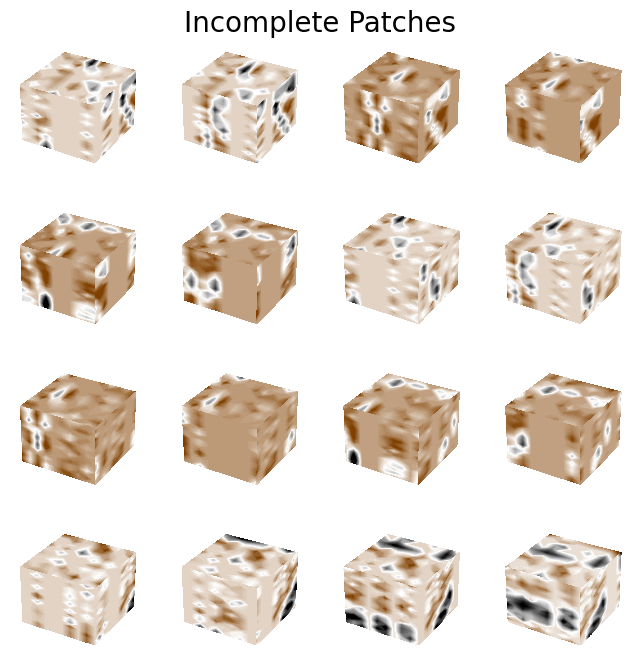

In [3]:
from pyseistr import patch3d,patch3d_inv,snr
X=patch3d(data,l1=16,l2=10,l3=10,s1=8,s2=2,s3=2);
Xnoisy=patch3d(noisy,l1=16,l2=10,l3=10,s1=8,s2=2,s3=2);
Xobs=patch3d(dobs,l1=16,l2=10,l3=10,s1=8,s2=2,s3=2);

from pyseistr import cseis
plt.imshow(X,aspect='auto',cmap=cseis());plt.ylabel('Patch NO');plt.xlabel('Patch Pixel');plt.show()

# plot clean patches
plt.figure(figsize=(8,8))
for ii in range(16):
            ax=plt.subplot(4,4,ii+1,projection='3d')
            plot3d(X[600+ii,:].reshape(16,10,10,order='F'),ifnewfig=False,showf=False,close=False)
            plt.gca().axis('off')
ax = plt.gcf().add_subplot(111, aspect='auto');plt.gca().axis('off');plt.title("Clean Patches",size=20)
plt.show()

# plot noisy patches
plt.figure(figsize=(8,8))
for ii in range(16):
            ax=plt.subplot(4,4,ii+1,projection='3d')
            plot3d(Xnoisy[600+ii,:].reshape(16,10,10,order='F'),ifnewfig=False,showf=False,close=False)
            plt.gca().axis('off')
ax = plt.gcf().add_subplot(111, aspect='auto');plt.gca().axis('off');plt.title("Noisy Patches",size=20)
plt.show()

# plot incomplete data patches
plt.figure(figsize=(8,8))
for ii in range(16):
            ax=plt.subplot(4,4,ii+1,projection='3d')
            plot3d(Xobs[600+ii,:].reshape(16,10,10,order='F'),ifnewfig=False,showf=False,close=False)
            plt.gca().axis('off')
ax = plt.gcf().add_subplot(111, aspect='auto');plt.gca().axis('off');plt.title("Incomplete Patches",size=20)
plt.show()

In [4]:
from keras import layers
from keras.models import Model
# from tensorflow.keras.layers import Input, Dense, Dropout, concatenate, LeakyReLU,BatchNormalization
# from tensorflow.keras.models import Model

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# The following architecture was used in 
# Chen, Y., Zhang, M., Bai, M., & Chen, W. (2019). Improving the signal‐to‐noise ratio of seismological datasets by unsupervised machine learning. Seismological Research Letters, 90(4), 1552-1564.

input = layers.Input(shape=(1600,))                            #or from tensorflow.keras.layers import Input, Dense
x = layers.Dense(128, activation="relu", name="layer1")(input)  
x = layers.Dense(1600, activation="linear", name="layer2")(x)  

# Autoencoder
autoencoder = Model(input,x)
autoencoder.summary()

# Compile
autoencoder.compile(optimizer="adam", loss='mse')


2025-01-01 15:59:20.987462: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer1 (Dense)                  │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 1600)           │       206,400 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 411,328 (1.57 MB)

 Trainable params: 411,328 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
import datetime
today=datetime.date.today()
weightname='best_model_%s.weights.h5'%str(today)


checkpoint = ModelCheckpoint(filepath=weightname,monitor='val_loss',mode = 'min',verbose=1,save_weights_only=True,save_best_only=True)
lr_reducer = ReduceLROnPlateau(factor=0.1,cooldown=0,patience=50,min_lr=0.5e-6,monitor='val_loss',mode = 'min',verbose= 1)

# autoencoder.fit(Xnoisy,Xnoisy, batch_size=128, verbose=1,epochs=20,callbacks=[checkpoint,lr_reducer],validation_split=0.2)
autoencoder.fit(Xobs,Xobs, batch_size=128, verbose=1,epochs=20,callbacks=[checkpoint,lr_reducer],validation_split=0.2)


Epoch 1/20
1/9 ━━━━━━━━━━━━━━━━━━━━ 4s 603ms/step - loss: 0.0966
Epoch 1: val_loss improved from inf to 0.05458, saving model to best_model_2025-01-01.weights.h5
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0979 - val_loss: 0.0546 - learning_rate: 0.0010
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0912 
Epoch 2: val_loss improved from 0.05458 to 0.05394, saving model to best_model_2025-01-01.weights.h5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0912 - val_loss: 0.0539 - learning_rate: 0.0010
Epoch 3/20
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0881
Epoch 3: val_loss improved from 0.05394 to 0.05328, saving model to best_model_2025-01-01.weights.h5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0878 - val_loss: 0.0533 - learning_rate: 0.0010
Epoch 4/20
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0858
Epoch 4: val_loss improved from 0.05328 to 0.05295, saving model to best_model_2025-01-01.weights.h5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0830 - 

In [6]:
Xout = autoencoder.predict(Xobs)

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


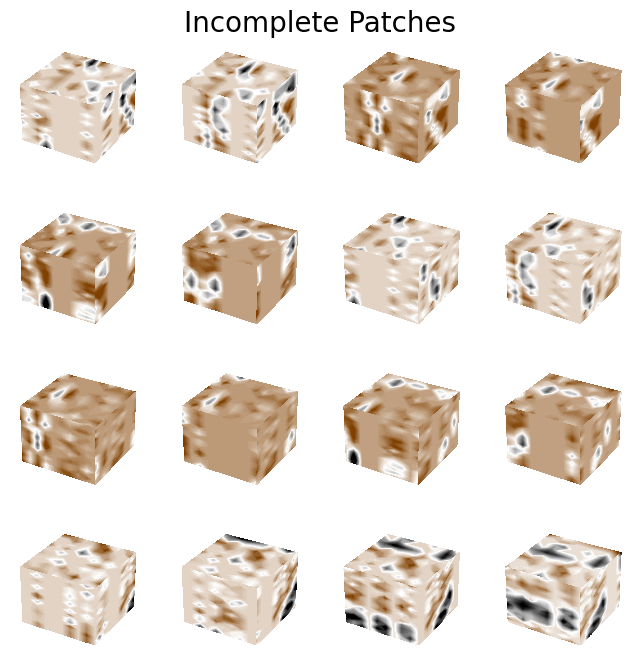

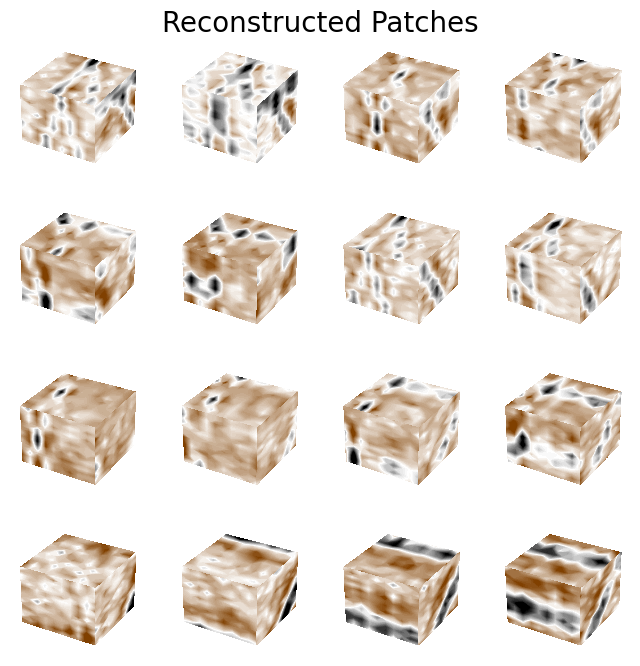

In [7]:

plt.figure(figsize=(8,8))
for ii in range(16):
            ax=plt.subplot(4,4,ii+1,projection='3d')
            plot3d(Xobs[600+ii,:].reshape(16,10,10,order='F'),ifnewfig=False,showf=False,close=False)
            plt.gca().axis('off')
ax = plt.gcf().add_subplot(111, aspect='auto');plt.gca().axis('off');plt.title("Incomplete Patches",size=20)
plt.show()

plt.figure(figsize=(8,8))
for ii in range(16):
            ax=plt.subplot(4,4,ii+1,projection='3d')
            plot3d(Xout[600+ii,:].reshape(16,10,10,order='F'),ifnewfig=False,showf=False,close=False)
            plt.gca().axis('off')
ax = plt.gcf().add_subplot(111, aspect='auto');plt.gca().axis('off');plt.title("Reconstructed Patches",size=20)
plt.show()

/Users/chenyk/aaspip.pyseistr/pyseistr/plot.py:125: UserWarning: The following kwargs were not used by contour: 'barlabel'
  _ = ax.contourf(
/Users/chenyk/aaspip.pyseistr/pyseistr/plot.py:130: UserWarning: The following kwargs were not used by contour: 'barlabel'
  _ = ax.contourf(
/Users/chenyk/aaspip.pyseistr/pyseistr/plot.py:135: UserWarning: The following kwargs were not used by contour: 'barlabel'
  C = ax.contourf(


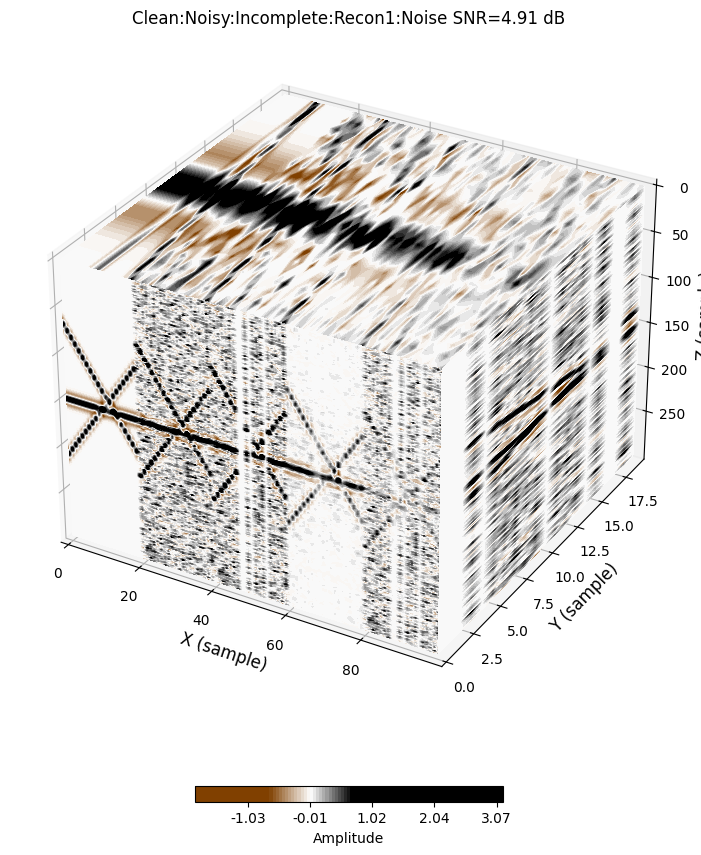

In [8]:
# reconstruct data using one iteration
recon1=patch3d_inv(Xout,nz,nx,ny,l1=16,l2=10,l3=10,s1=8,s2=2,s3=2);

plot3d(np.concatenate([data,noisy,dobs,recon1,dobs-recon1],axis=1),vmin=-1,vmax=1,figsize=(14,10),z=np.arange(nz)*dz,x=np.arange(nx*5)*dx,y=np.arange(ny)*dy,barlabel='Amplitude',showf=False,close=False)
plt.gca().set_xlabel("X (sample)",fontsize='large', fontweight='normal')
plt.gca().set_ylabel("Y (sample)",fontsize='large', fontweight='normal')
plt.gca().set_zlabel("Z (sample)",fontsize='large', fontweight='normal')
plt.title('Clean:Noisy:Incomplete:Recon1:Noise SNR={SNR:.2f} dB'.format(SNR=snr(data,recon1,mode=2)))
plt.savefig(fname='data3d-recon1.png',format='png',dpi=300)
plt.show()

In [9]:
niter=10 
a=np.linspace(1,0,niter); ##relaxation parameter (see Saad et al., 2023, Geophysics)
dnew=dobs;
for iter in range(niter):

    
    Xnew=patch3d(dnew,l1=16,l2=10,l3=10,s1=8,s2=2,s3=2);
    autoencoder.fit(Xnew,Xnew, batch_size=128, verbose=1,epochs=20,callbacks=[checkpoint,lr_reducer],validation_split=0.2)
    Xout = autoencoder.predict(Xnew)
    recon=patch3d_inv(Xout,nz,nx,ny,l1=16,l2=10,l3=10,s1=8,s2=2,s3=2);
    
    dnew=a[iter]*mask*dobs+(1-a[iter]*mask)*recon;

    print("SNR after %d iterations is %g"%(iter+1,snr(data,dnew,mode=2)));


Epoch 1/20
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0550
Epoch 1: val_loss did not improve from 0.05198
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0554 - val_loss: 0.0520 - learning_rate: 0.0010
Epoch 2/20
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0566
Epoch 2: val_loss did not improve from 0.05198
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0554 - val_loss: 0.0520 - learning_rate: 0.0010
Epoch 3/20
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0550
Epoch 3: val_loss did not improve from 0.05198
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0546 - val_loss: 0.0520 - learning_rate: 0.0010
Epoch 4/20
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0545
Epoch 4: val_loss did not improve from 0.05198
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0541 - val_loss: 0.0520 - learning_rate: 0.0010
Epoch 5/20
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0535
Epoch 5: val_loss did not improve from 0.05198
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0537 - val_loss: 

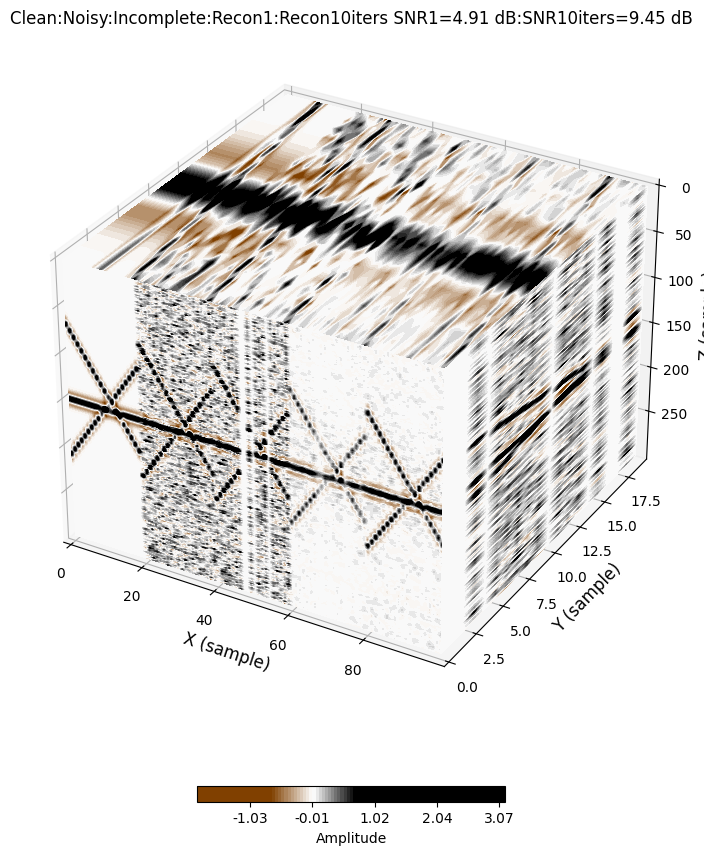

In [10]:
plot3d(np.concatenate([data,noisy,dobs,recon1,dnew],axis=1),vmin=-1,vmax=1,figsize=(14,10),z=np.arange(nz)*dz,x=np.arange(nx*5)*dx,y=np.arange(ny)*dy,barlabel='Amplitude',showf=False,close=False)
plt.gca().set_xlabel("X (sample)",fontsize='large', fontweight='normal')
plt.gca().set_ylabel("Y (sample)",fontsize='large', fontweight='normal')
plt.gca().set_zlabel("Z (sample)",fontsize='large', fontweight='normal')
plt.title('Clean:Noisy:Incomplete:Recon1:Recon{iter:d}iters SNR1={SNR1:.2f} dB:SNR{iter:d}iters={SNR2:.2f} dB'.format(SNR1=snr(data,recon1,mode=2),SNR2=snr(data,dnew,mode=2),iter=niter))
plt.savefig(fname='data3d-recon%d.png'%niter,format='png',dpi=300)
plt.show()

In [11]:
## Different implementations

from tensorflow.keras.layers import Input, Dense, Dropout, concatenate, LeakyReLU,BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# The following architecture was used in 
# Saad, O. M., & Chen, Y. (2021). A fully unsupervised and highly generalized deep learning approach for random noise suppression. Geophysical Prospecting, 69(4), 709-726.

## In comparison with a simpler and textbook example
# input = layers.Input(shape=(256,))                            
# x = layers.Dense(64, activation="relu", name="layer1")(input)  
# x = layers.Dense(256, activation="linear", name="layer2")(x)  

input = Input(shape=(1600,))

encoded02 = Dense(800,  activation='relu')(input)

encoded01 = Dense(400,  activation='relu')(encoded02)

encoded1 = Dense(128,  activation='relu')(encoded01)
#encoded1 = BatchNormalization()(encoded1)
#encoded1 = Dropout(0.01)(encoded1)

encoded2 = Dense(64,  activation='relu')(encoded1)
#encoded2 = BatchNormalization()(encoded2)
#encoded2 = Dropout(0.01)(encoded2)

encoded3 = Dense(32,  activation='relu' )(encoded2)
#encoded3 = BatchNormalization()(encoded3)
#encoded3 = Dropout(0.01)(encoded3)

encoded4 = Dense(16,  activation='relu' )(encoded3)
#encoded3 = BatchNormalization()(encoded3)
#encoded4 = Dropout(0.01)(encoded4)

encoded5 = Dense(8,  activation='relu' )(encoded4)
#encoded5 = BatchNormalization()(encoded5)
#encoded5 = Dropout(0.01)(encoded5)

encoded6 = Dense(4,  activation='relu' )(encoded5)
#encoded6 = BatchNormalization()(encoded6)
#encoded6 = Dropout(0.01)(encoded6)

# Decoder

decoded1aa = Dense(4,  activation='relu' )(encoded6)
#decoded1aa = BatchNormalization()(decoded1aa)
decoded1aa = concatenate([decoded1aa,encoded6])
#decoded1aa = Dropout(0.01)(decoded1aa)


decoded1a = Dense(8,  activation='relu' )(decoded1aa)
#decoded1a = BatchNormalization()(decoded1a)
decoded1a = concatenate([decoded1a,encoded5])
#decoded1a = Dropout(0.01)(decoded1a)

decoded1 = Dense(16,  activation='relu' )(decoded1a)
#decoded1 = BatchNormalization()(decoded1)
decoded1 = concatenate([decoded1,encoded4])
#decoded1 = Dropout(0.01)(decoded1)

decoded2 = Dense(32,  activation='relu')(decoded1)
#decoded2 = BatchNormalization()(decoded2)
decoded2 = concatenate([decoded2,encoded3])
#decoded2 = Dropout(0.01)(decoded2)

decoded3 = Dense(64,  activation='relu' )(decoded2)
#decoded3 = BatchNormalization()(decoded3)
decoded3 = concatenate([decoded3,encoded2])
#decoded3 = Dropout(0.01)(decoded3)

decoded4 = Dense(128,  activation='relu' )(decoded3)
#decoded4 = BatchNormalization()(decoded4)
decoded4 = concatenate([decoded4,encoded1])
#decoded4 = Dropout(0.01)(decoded4)

decoded401 = Dense(400,  activation='relu' )(decoded4)
decoded401 = concatenate([decoded401,encoded01])

decoded402 = Dense(800,  activation='relu' )(decoded401)
decoded402 = concatenate([decoded402,encoded02])

#decoded = Flatten()(decoded3)
x = Dense(1600, activation='linear')(decoded402)


# Autoencoder
autoencoder = Model(input,x)
autoencoder.summary()

# Compile
autoencoder.compile(optimizer="adam", loss='mse')


import datetime
today=datetime.date.today()
weightname='best_model_PATCHUNET_%s.weights.h5'%str(today)

earlystop  = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
checkpoint = ModelCheckpoint(filepath=weightname,monitor='val_loss',mode = 'min',verbose=1,save_weights_only=True,save_best_only=True)
lr_reducer = ReduceLROnPlateau(factor=0.1,cooldown=0,patience=50,min_lr=0.5e-6,monitor='val_loss',mode = 'min',verbose= 1)

autoencoder.fit(Xobs,Xobs, batch_size=128, verbose=1,epochs=4,callbacks=[earlystop,checkpoint,lr_reducer],validation_split=0.2)



Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 1600)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 800)       │  1,280,800 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 400)       │    320,400 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 128)       │     51,328 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 64)        │      8,256 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 32)        │      2,080 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 16)        │        528 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 8)         │        136 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 4)         │         36 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 4)         │         20 │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 8)         │          0 │ dense_8[0][0],    │
│ (Concatenate)       │                   │            │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 8)         │         72 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 16)        │          0 │ dense_9[0][0],    │
│ (Concatenate)       │                   │            │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 16)        │        272 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 32)        │          0 │ dense_10[0][0],   │
│ (Concatenate)       │                   │            │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 32)        │      1,056 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 64)        │          0 │ dense_11[0][0],   │
│ (Concatenate)       │                   │            │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 64)        │      4,160 │ concatenate_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 128)       │          0 │ dense_12[0][0],   │
│ (Concatenate)       │                   │            │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 128)       │     16,512 │ concatenate_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_5       │ (None, 256)       │          0 │ dense_13[0][0],   │
│ (Concatenate)       │                   │            │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 4,990,856 (19.04 MB)

 Trainable params: 4,990,856 (19.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/4
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.1139
Epoch 1: val_loss improved from inf to 0.06021, saving model to best_model_PATCHUNET_2025-01-01.weights.h5
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - loss: 0.1134 - val_loss: 0.0602 - learning_rate: 0.0010
Epoch 2/4
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0867
Epoch 2: val_loss improved from 0.06021 to 0.05764, saving model to best_model_PATCHUNET_2025-01-01.weights.h5
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 0.0864 - val_loss: 0.0576 - learning_rate: 0.0010
Epoch 3/4
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0729
Epoch 3: val_loss improved from 0.05764 to 0.05599, saving model to best_model_PATCHUNET_2025-01-01.weights.h5
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.0726 - val_loss: 0.0560 - learning_rate: 0.0010
Epoch 4/4
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0622
Epoch 4: val_loss improved from 0.05599 to 0.05480, saving model to best_model_PATCHUNET_2025-01-01.weights.h5
9/9 ━━━━━━━━━━━━━━

42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


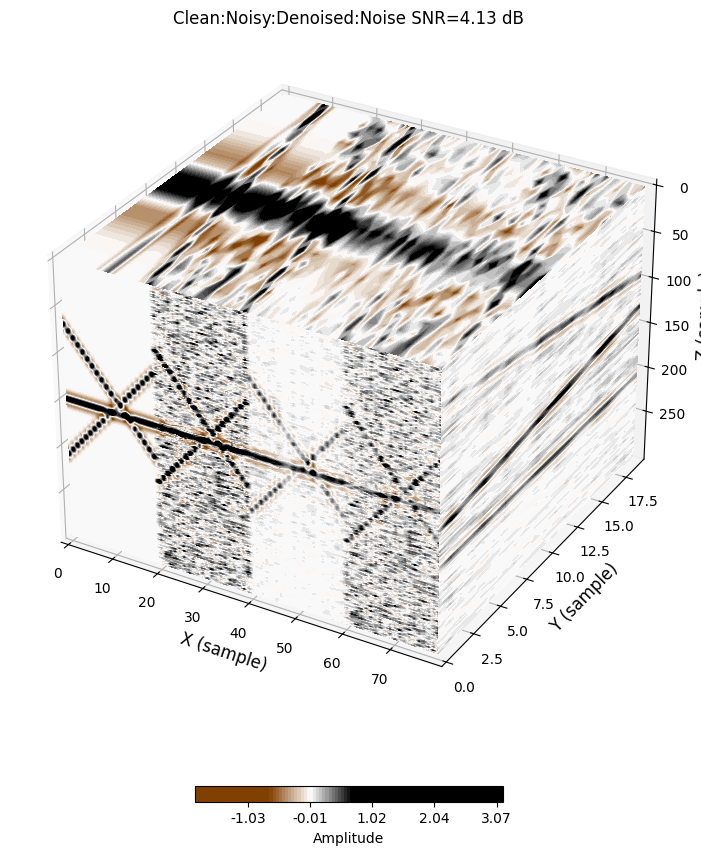

In [12]:
Xout2 = autoencoder.predict(Xobs)

# reconstruct data
recon1_2=patch3d_inv(Xout2,nz,nx,ny,l1=16,l2=10,l3=10,s1=8,s2=2,s3=2);

plot3d(np.concatenate([data,noisy,recon1_2,noisy-recon1_2],axis=1),vmin=-1,vmax=1,figsize=(14,10),z=np.arange(nz)*dz,x=np.arange(nx*4)*dx,y=np.arange(ny)*dy,barlabel='Amplitude',showf=False,close=False)
plt.gca().set_xlabel("X (sample)",fontsize='large', fontweight='normal')
plt.gca().set_ylabel("Y (sample)",fontsize='large', fontweight='normal')
plt.gca().set_zlabel("Z (sample)",fontsize='large', fontweight='normal')
plt.title('Clean:Noisy:Denoised:Noise SNR={SNR:.2f} dB'.format(SNR=snr(data,recon1_2,mode=2)))
plt.savefig(fname='data3d-recon1-2.png',format='png',dpi=300)
plt.show()


In [13]:
niter=10 
a=np.linspace(1,0,niter); ##relaxation parameter (see Saad et al., 2023, Geophysics)
dnew2=dobs;
for iter in range(niter):

    
    Xnew2=patch3d(dnew2,l1=16,l2=10,l3=10,s1=8,s2=2,s3=2);
    autoencoder.fit(Xnew2,Xnew2, batch_size=128, verbose=1,epochs=4,callbacks=[earlystop,checkpoint,lr_reducer],validation_split=0.2)
    Xout2 = autoencoder.predict(Xnew2)
    recon2=patch3d_inv(Xout2,nz,nx,ny,l1=16,l2=10,l3=10,s1=8,s2=2,s3=2);
    
    dnew2=a[iter]*mask*dobs+(1-a[iter]*mask)*recon2;

    print("SNR after %d iterations is %g"%(iter+1,snr(data,dnew2,mode=2)));

Epoch 1/4
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0556
Epoch 1: val_loss improved from 0.05480 to 0.05392, saving model to best_model_PATCHUNET_2025-01-01.weights.h5
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - loss: 0.0555 - val_loss: 0.0539 - learning_rate: 0.0010
Epoch 2/4
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0500
Epoch 2: val_loss improved from 0.05392 to 0.05325, saving model to best_model_PATCHUNET_2025-01-01.weights.h5
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0500 - val_loss: 0.0532 - learning_rate: 0.0010
Epoch 3/4
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0458
Epoch 3: val_loss improved from 0.05325 to 0.05275, saving model to best_model_PATCHUNET_2025-01-01.weights.h5
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 0.0458 - val_loss: 0.0527 - learning_rate: 0.0010
Epoch 4/4
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.0416
Epoch 4: val_loss improved from 0.05275 to 0.05229, saving model to best_model_PATCHUNET_2025-01-01.weights.h5
9/9 ━━━━━━━━━━

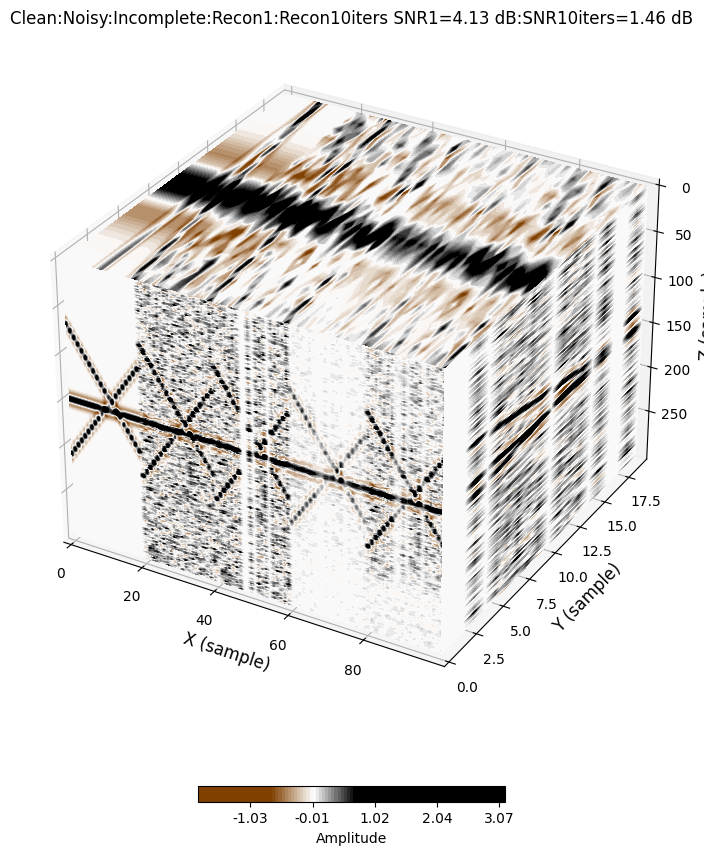

In [14]:
plot3d(np.concatenate([data,noisy,dobs,recon1_2,dnew2],axis=1),vmin=-1,vmax=1,figsize=(14,10),z=np.arange(nz)*dz,x=np.arange(nx*5)*dx,y=np.arange(ny)*dy,barlabel='Amplitude',showf=False,close=False)
plt.gca().set_xlabel("X (sample)",fontsize='large', fontweight='normal')
plt.gca().set_ylabel("Y (sample)",fontsize='large', fontweight='normal')
plt.gca().set_zlabel("Z (sample)",fontsize='large', fontweight='normal')
plt.title('Clean:Noisy:Incomplete:Recon1:Recon{iter:d}iters SNR1={SNR1:.2f} dB:SNR{iter:d}iters={SNR2:.2f} dB'.format(SNR1=snr(data,recon1_2,mode=2),SNR2=snr(data,dnew2,mode=2),iter=niter))
plt.savefig(fname='data3d-recon2-%d.png'%niter,format='png',dpi=300)
plt.show()

## NOTE:
##
## Why a much more complicated network architecture does not bring as much benefit as we want
##
## Maybe because this problem is not complicated enough that needs a complicated architecture
## e.g., the data structure is not complicated at all (here it is simply linear events)
## So, always be careful about designing the "complicated" network architecture that best suits your data
##
## In this denoising and (especially) reconstruction example, the disadvantage of complicated architecture becomes more dominant
# Because it is better at extracting the complicated patterns in the data, including the missing-data (e.g., gap) patterns which 
# are prone to be neglected and smoothed in simpler architecture, which, however, favors the data reconstruction. 
# 
# Takeaway: Simple may be better in certain scenarios.